In [32]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
import statsmodels.api as sm

In [2]:
df = pd.read_csv('consumo_julho.csv')

In [3]:
df['dt_geracao'] = pd.to_datetime(df['dt_geracao'])

C:\Users\guilherme.m.gondo\Anaconda3n\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\guilherme.m.gondo\Anaconda3n\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\guilherme.m.gondo\Anaconda3n\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/10/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\guilherme.m.gondo\Anaconda3n\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/10/

In [4]:
df['nome'].unique()

array(['TIRA REATIVA PARA DOSAGEM DE GLICEMIA,EMBALADAS INDIVIDUALMENTE',
       'DIALISADOR DE ALTO DESEMPENHO',
       'SERINGA DE 60 ML, COM BICO LUER LOCK CENTRAL',
       'SERINGA HEPARINIZADA DESCARTAVEL DE 2 ML',
       'FILTRO BACTERIANO HMEF 150ML A 1.500ML'], dtype=object)

In [130]:
tiara = df[df['nome']=='SERINGA HEPARINIZADA DESCARTAVEL DE 2 ML'].copy()

In [131]:
data_inicio = '2019-01-02'
data_fim = '2021-12-06'

# Crie um DataFrame de calendário com datas diárias no intervalo especificado
calendario = pd.date_range(start=data_inicio, end=data_fim, freq='D')

# Converta as datas em um DataFrame do Pandas
df_calendario = pd.DataFrame({'Data': calendario})

In [132]:
test = pd.merge(df_calendario,tiara,left_on='Data',right_on='dt_geracao',how='left')

In [133]:
resumo = test.groupby('Data')['quantidade'].sum().reset_index()

In [134]:
data = resumo.set_index('Data')

<AxesSubplot:xlabel='Data'>

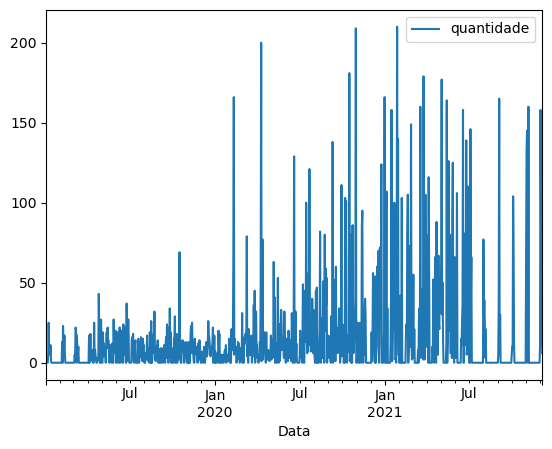

In [135]:
data.plot()

In [136]:
to_row = 890

In [137]:
data[890:]

,quantidade
Data,
2021-06-10,0.0
2021-06-11,0.0
2021-06-12,0.0
2021-06-13,0.0
2021-06-14,15.0
...,...
2021-12-02,158.0
2021-12-03,103.0
2021-12-04,36.0


In [138]:
training_data = list(data[0:to_row]['quantidade'])
testing_data = list(data[to_row:]['quantidade'])

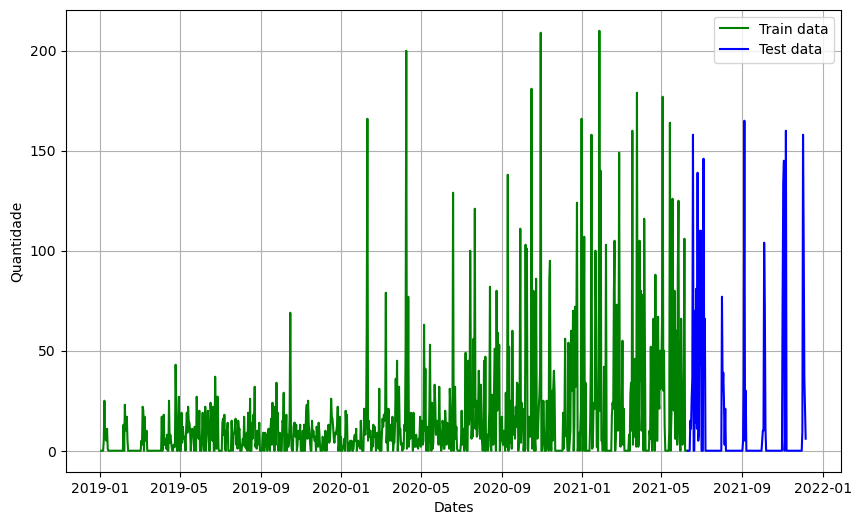

In [139]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Quantidade')
plt.plot(data[0:to_row]['quantidade'],'green',label='Train data')
plt.plot(data[to_row:]['quantidade'],'blue',label='Test data')
plt.legend()

In [140]:
model_prediction = []
n_test_obser = len(testing_data)

In [141]:
for i in range(n_test_obser):
    model = sm.tsa.arima.ARIMA(training_data,order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output)[0]
    model_prediction.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)
    #print(output)

In [142]:
#list(output)[0]

In [143]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1069
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5119.856
Date:                Tue, 24 Oct 2023   AIC                          10245.712
Time:                        21:02:40   BIC                          10260.632
Sample:                             0   HQIC                         10251.365
                               - 1069                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0924      0.023      4.049      0.000       0.048       0.137
ma.L1         -0.9782      0.006   -155.741      0.000      -0.990      -0.966
sigma2       851.5853     14.279     59.638      0.0

In [144]:
len(model_prediction), len(testing_data)

(180, 180)

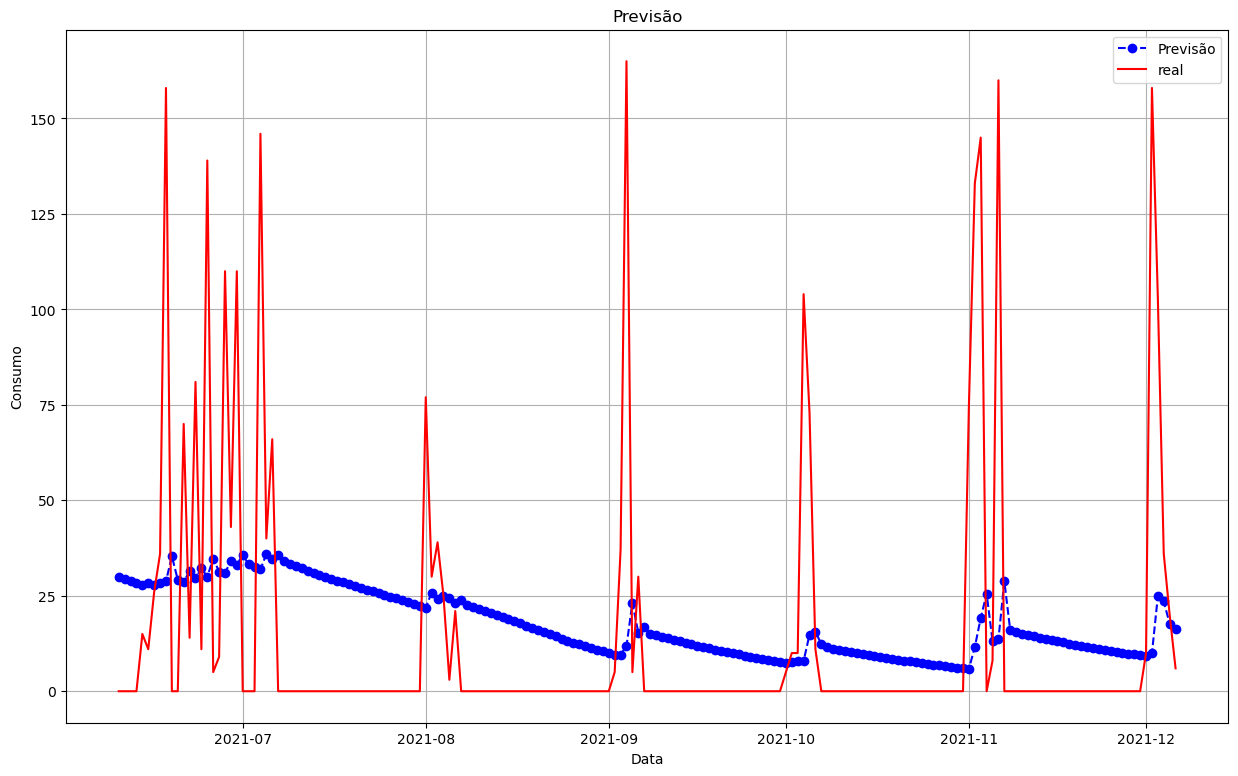

In [145]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = data[to_row:].index

plt.plot(data_range,model_prediction,color='blue',marker='o',linestyle='dashed',label='Previsão')
plt.plot(data_range,testing_data,color='red',label='real')
plt.title('Previsão')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()
plt.show()

In [146]:
mape = np.mean(np.abs(np.array(model_prediction)-np.array(testing_data))/np.abs(testing_data))

C:\Users\guilherme.m.gondo\AppData\Local\Temp\ipykernel_22388\1983105254.py:1: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(np.array(model_prediction)-np.array(testing_data))/np.abs(testing_data))


In [147]:
mape

inf

In [148]:
pred = pd.DataFrame(model_prediction,columns=['Previsão'])

In [149]:
real = pd.DataFrame(testing_data,columns=['Real'])

In [150]:
result = pd.concat([pred, real], axis=1)

In [151]:
result['Erro'] = result['Previsão'] - result['Real']

In [152]:
result['Erro'].sum()

648.1115166981391

In [153]:
result['Real'].sum()

2594.0

In [154]:
result['Erro'].sum()/result['Real'].sum()

0.24985023774022325

In [155]:
result['Previsão'].sum()

3242.111516698139

In [156]:
len(result)

180

In [157]:
result['Erro_Absoluto'] = result['Erro'].abs()

In [158]:
result['Erro_Absoluto'].mean()

23.443578068748668

In [159]:
result['Erro'].mean()

3.6006195372118843